### Import libraries

In [1]:
import torch
import warnings
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

from tqdm import tqdm
from PIL import Image
from torch.utils.data import DataLoader
from datasets.gta5 import GTA5
from datasets.cityscapes import CityScapes
from torchvision.transforms import ToPILImage
from torchvision import transforms

from utils import fast_hist, per_class_iou
from models.bisenet.build_bisenet import BiSeNet

warnings.filterwarnings("ignore")

### Training

In [2]:
device = torch.device("cuda")
# Load model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
# Set model to training mode
model.train()

# Load the dataset
dataset = GTA5(root_dir='datasets/GTA5')
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=4)

# Loss function
criterion = nn.CrossEntropyLoss(ignore_index=255)
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)

# Training loop
for epoch in range(50):
    hist = np.zeros((19, 19))

    # Iterate over the dataset
    for i, (images, labels) in enumerate(tqdm(dataloader)):
        # Move the data to the device
        images = images.to(device)
        label = labels.to(device)
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        output = model(images)[0]
        # Compute the loss
        loss = criterion(output, label)
        # Backward pass
        loss.backward()
        # Update the weights
        optimizer.step()
        # Compute the predictions
        pred = output.argmax(dim=1)

        # Calculate the mean IoU
        hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
        miou = np.mean(per_class_iou(hist))

    # Print the loss and mIoU
    print(f'Epoch: {epoch}, Loss: {loss.item()}, mIoU: {miou}')

# Save the model
torch.save(model.state_dict(), 'models/bisenet/bisenet_gta5.pth')

100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 0, Loss: 0.49200838804244995, mIoU: 0.23155902930278582


100%|██████████| 313/313 [02:20<00:00,  2.24it/s]


Epoch: 1, Loss: 0.3492729961872101, mIoU: 0.30689195327904584


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 2, Loss: 0.37495172023773193, mIoU: 0.34923315882170824


100%|██████████| 313/313 [02:19<00:00,  2.24it/s]


Epoch: 3, Loss: 0.25557151436805725, mIoU: 0.38659726615179946


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 4, Loss: 0.29095157980918884, mIoU: 0.4236768858643893


100%|██████████| 313/313 [02:20<00:00,  2.23it/s]


Epoch: 5, Loss: 0.19828687608242035, mIoU: 0.4509207130946646


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 6, Loss: 0.24771878123283386, mIoU: 0.46802794429186945


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 7, Loss: 0.2730312943458557, mIoU: 0.4829441318371002


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 8, Loss: 0.22059299051761627, mIoU: 0.49805878657251124


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 9, Loss: 0.2275262176990509, mIoU: 0.5070151031442929


100%|██████████| 313/313 [02:22<00:00,  2.19it/s]


Epoch: 10, Loss: 0.213701069355011, mIoU: 0.5171047015928386


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 11, Loss: 0.22410446405410767, mIoU: 0.526065204131038


100%|██████████| 313/313 [02:23<00:00,  2.18it/s]


Epoch: 12, Loss: 0.24674685299396515, mIoU: 0.5324105710698053


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 13, Loss: 0.27377694845199585, mIoU: 0.540013729540492


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 14, Loss: 0.1476883441209793, mIoU: 0.5475379763457339


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 15, Loss: 0.24620364606380463, mIoU: 0.5559988195440767


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 16, Loss: 0.2325836420059204, mIoU: 0.5595462911973113


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 17, Loss: 0.22989030182361603, mIoU: 0.5676514776990408


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 18, Loss: 0.22029180824756622, mIoU: 0.5745469181474278


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 19, Loss: 0.2217409908771515, mIoU: 0.5808202610496975


100%|██████████| 313/313 [02:21<00:00,  2.20it/s]


Epoch: 20, Loss: 0.16354267299175262, mIoU: 0.5869531883371402


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 21, Loss: 0.16560667753219604, mIoU: 0.5940638521196812


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 22, Loss: 0.1985427737236023, mIoU: 0.5980412828798567


100%|██████████| 313/313 [02:20<00:00,  2.24it/s]


Epoch: 23, Loss: 0.1845429539680481, mIoU: 0.6056155035291851


100%|██████████| 313/313 [02:20<00:00,  2.23it/s]


Epoch: 24, Loss: 0.15208326280117035, mIoU: 0.6059574376074993


100%|██████████| 313/313 [02:20<00:00,  2.23it/s]


Epoch: 25, Loss: 0.14485366642475128, mIoU: 0.6108704512070564


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 26, Loss: 0.12191978096961975, mIoU: 0.6167437487491259


100%|██████████| 313/313 [02:20<00:00,  2.23it/s]


Epoch: 27, Loss: 0.2957478165626526, mIoU: 0.6195032144101472


100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 28, Loss: 0.1436351239681244, mIoU: 0.6207074064769903


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 29, Loss: 0.22950826585292816, mIoU: 0.6260981121112362


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 30, Loss: 0.16834844648838043, mIoU: 0.6306076116121909


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 31, Loss: 0.13469623029232025, mIoU: 0.6339558283657455


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 32, Loss: 0.15322406589984894, mIoU: 0.6391064305331638


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 33, Loss: 0.17116676270961761, mIoU: 0.6409457560089902


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 34, Loss: 0.17851729691028595, mIoU: 0.6426059775043027


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 35, Loss: 0.17512358725070953, mIoU: 0.6448314392637382


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 36, Loss: 0.32255473732948303, mIoU: 0.6488341361768957


100%|██████████| 313/313 [02:22<00:00,  2.19it/s]


Epoch: 37, Loss: 0.13401812314987183, mIoU: 0.6503778274787185


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 38, Loss: 0.14528752863407135, mIoU: 0.654643976436792


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 39, Loss: 0.11680502444505692, mIoU: 0.6553058494358974


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 40, Loss: 0.1310836672782898, mIoU: 0.6591535231709759


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 41, Loss: 0.15389075875282288, mIoU: 0.6592672363880837


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 42, Loss: 0.12241387367248535, mIoU: 0.6622843927055038


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 43, Loss: 0.14314410090446472, mIoU: 0.66270161673647


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 44, Loss: 0.14229390025138855, mIoU: 0.667704170436999


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 45, Loss: 0.1531320959329605, mIoU: 0.6682462794892899


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 46, Loss: 0.10912108421325684, mIoU: 0.6726153414634067


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 47, Loss: 0.14029978215694427, mIoU: 0.671712187380113


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 48, Loss: 0.1281544715166092, mIoU: 0.6750790546997715


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]

Epoch: 49, Loss: 0.19050902128219604, mIoU: 0.6749960074374766


### Evaluation - GTA 5 (Training Set)

0it [00:00, ?it/s]


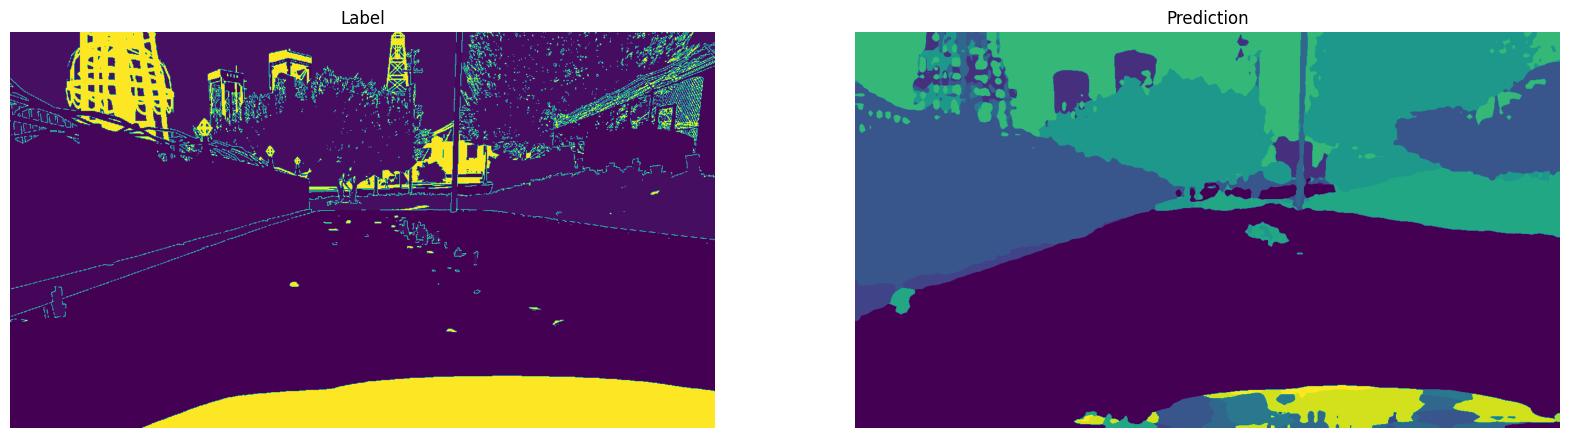

In [3]:
# Get the device
device = torch.device("cuda")

# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_gta5.pth'))
# Set model to evaluation mode
model.eval()

# Load the dataset
dataset = GTA5(root_dir='datasets/GTA5')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=1)

for i, (image, label) in tqdm(enumerate(dataloader)):
    # Move the data to the device
    image = image.to(device)
    label = label.to(device)
    # Forward pass
    output = model(image)
    # Compute the predictions
    pred = output.argmax(dim=1)
    # Stop after the first iteration
    break

# Display the image
image = ToPILImage()(image[0].cpu())
# Convert label, pred from numpy to image
label = Image.fromarray(label[0].cpu().numpy().astype(np.uint8))
pred = Image.fromarray(pred[0].cpu().numpy().astype(np.uint8))

# Display the image
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(label)
plt.title('Label')
plt.axis('off')
plt.subplot(122)
plt.imshow(pred)
plt.title('Prediction')
plt.axis('off')
plt.show()

### Evaluation - CityScapes (Training and Validation set)

In [57]:
# These are the class labels for the Cityscapes dataset
class_labels = {
    0: 'road',
    1: 'sidewalk',
    2: 'building',
    3: 'wall',
    4: 'fence',
    5: 'pole',
    6: 'traffic light',
    7: 'traffic sign',
    8: 'vegetation',
    9: 'terrain',
    10: 'sky',
    11: 'person',
    12: 'rider',
    13: 'car',
    14: 'truck',
    15: 'bus',
    16: 'train',
    17: 'motorcycle',
    18: 'bicycle'
}

In [61]:
# Get the device
device = torch.device("cuda")

# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_gta5.pth'))
# Set model to evaluation mode
model.eval()

## Get the miou for the Cityscapes dataset in the training split
# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='train')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=6)

# Evaluate the model
hist = np.zeros((19, 19))
for i, (images, labels) in enumerate(tqdm(dataloader)):
    # Move the data to the device
    images = images.to(device)
    label = labels.to(device)
    # Forward pass
    output = model(images)[0]
    # Compute the predictions
    pred = output.argmax(dim=0)

    # Calculate the mean IoU
    hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)

## Get the miou for the Cityscapes dataset in the validation split
# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=6)

# Evaluate the model
for i, (images, labels) in enumerate(tqdm(dataloader)):
    # Move the data to the device
    images = images.to(device)
    label = labels.to(device)
    # Forward pass
    output = model(images)[0]
    # Compute the predictions
    pred = output.argmax(dim=0)

    # Calculate the mean IoU
    hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
    
# Calculate the mean IoU
miou = np.mean(per_class_iou(hist))
print(f"Mean IoU: {miou:.4f} \n")

class_ious = per_class_iou(hist)
# Print per-class IoU
for i, iou in enumerate(class_ious):
    print(f"{class_labels[i]} IoU: {iou:.4f}")

100%|██████████| 500/500 [00:05<00:00, 85.33it/s]

Mean IoU: 0.2182 

road IoU: 0.5318
sidewalk IoU: 0.0956
building IoU: 0.5682
wall IoU: 0.0813
fence IoU: 0.0740
pole IoU: 0.1186
traffic light IoU: 0.0457
traffic sign IoU: 0.0314
vegetation IoU: 0.7120
terrain IoU: 0.1709
sky IoU: 0.5888
person IoU: 0.3434
rider IoU: 0.0459
car IoU: 0.5633
truck IoU: 0.0257
bus IoU: 0.0278
train IoU: 0.0219
motorcycle IoU: 0.0989
bicycle IoU: 0.0008


### Evaluation - CityScapes (Training set)

In [59]:
# Get the device
device = torch.device("cuda")

# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_gta5.pth'))
# Set model to evaluation mode
model.eval()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='train')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=6)

# Evaluate the model
hist = np.zeros((19, 19))
for i, (images, labels) in enumerate(tqdm(dataloader)):
    # Move the data to the device
    images = images.to(device)
    label = labels.to(device)
    # Forward pass
    output = model(images)[0]
    # Compute the predictions
    pred = output.argmax(dim=0)

    # Calculate the mean IoU
    hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
    
    
# Calculate the mean IoU
miou = np.mean(per_class_iou(hist))
print(f"Mean IoU: {miou:.4f} \n")

class_ious = per_class_iou(hist)
# Print per-class IoU
for i, iou in enumerate(class_ious):
    print(f"{class_labels[i]} IoU: {iou:.4f}")

100%|██████████| 1572/1572 [00:18<00:00, 86.98it/s]

Mean IoU: 0.2228 

road IoU: 0.5404
sidewalk IoU: 0.0987
building IoU: 0.5772
wall IoU: 0.0809
fence IoU: 0.0855
pole IoU: 0.1161
traffic light IoU: 0.0472
traffic sign IoU: 0.0302
vegetation IoU: 0.7137
terrain IoU: 0.1792
sky IoU: 0.6058
person IoU: 0.3479
rider IoU: 0.0418
car IoU: 0.5695
truck IoU: 0.0264
bus IoU: 0.0212
train IoU: 0.0264
motorcycle IoU: 0.1237
bicycle IoU: 0.0012


### Evaluation - CityScapes (Validation set)

In [54]:
# Get the device
device = torch.device("cuda")

# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_gta5.pth'))
# Set model to evaluation mode
model.eval()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=6)

# Evaluate the model
hist = np.zeros((19, 19))
for i, (images, labels) in enumerate(tqdm(dataloader)):
    # Move the data to the device
    images = images.to(device)
    label = labels.to(device)
    # Forward pass
    output = model(images)[0]
    # Compute the predictions
    pred = output.argmax(dim=0)

    # Calculate the mean IoU
    hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
    miou = np.mean(per_class_iou(hist))
    
# Calculate the mean IoU
miou = np.mean(per_class_iou(hist))
print(f"Mean IoU: {miou:.4f} \n")

class_ious = per_class_iou(hist)
# Print per-class IoU
for i, iou in enumerate(class_ious):
    print(f"{class_labels[i]} IoU: {iou:.4f}")

100%|██████████| 500/500 [00:05<00:00, 85.62it/s]

Mean IoU: 0.2034 

road IoU: 0.5054
sidewalk IoU: 0.0835
building IoU: 0.5385
wall IoU: 0.0829
fence IoU: 0.0323
pole IoU: 0.1255
traffic light IoU: 0.0417
traffic sign IoU: 0.0346
vegetation IoU: 0.7071
terrain IoU: 0.1456
sky IoU: 0.5332
person IoU: 0.3304
rider IoU: 0.0550
car IoU: 0.5439
truck IoU: 0.0240
bus IoU: 0.0472
train IoU: 0.0001
motorcycle IoU: 0.0338
bicycle IoU: 0.0001


### Example

0it [00:00, ?it/s]


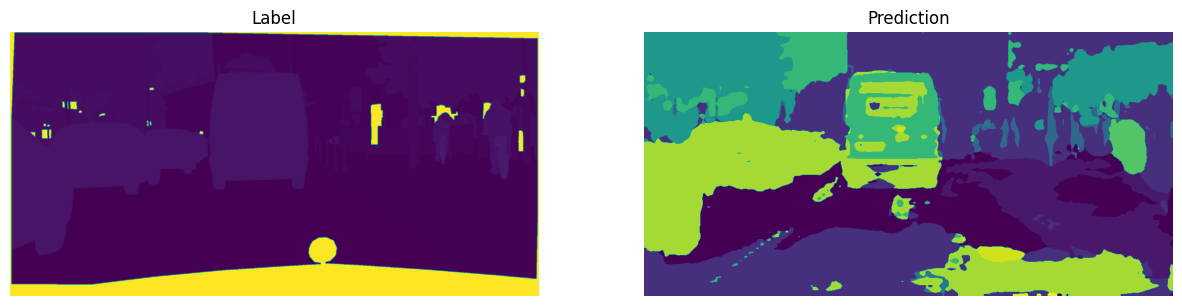

In [53]:
# Get the device
device = torch.device("cuda")

# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_gta5.pth'))
# Set model to evaluation mode
model.eval()

# Custom transformation for the Cityscapes dataset
# This is needed because the GTA 5 dataset has different mean and standard deviation
custom_transform = transforms.Compose([
    transforms.Resize((512, 1024)),
    transforms.ToTensor(),
    # Normalize the image using the mean and standard deviation of GTA 5 dataset
    transforms.Normalize(
        mean=[0.5084, 0.5021, 0.4838], 
        std=[0.2490, 0.2440, 0.2424]),
])

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=1)

for i, (image, label) in tqdm(enumerate(dataloader)):
    # Move the data to the device
    image = image.to(device)
    label = label.to(device)
    # Forward pass
    output = model(image)
    # Compute the predictions
    pred = output.argmax(dim=1)
    # Stop after the first iteration
    break

# Display the image
image = ToPILImage()(image[0].cpu())
# Convert label, pred from numpy to image
label = Image.fromarray(label[0].cpu().numpy().astype(np.uint8))
pred = Image.fromarray(pred[0].cpu().numpy().astype(np.uint8))

# Display the image
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(label)
plt.title('Label')
plt.axis('off')
plt.subplot(122)
plt.imshow(pred)
plt.title('Prediction')
plt.axis('off')
plt.show()